- ## ****Decision Tree classifier****
   - ### ****Overall Performance: The Decision Tree model achieved an ROC-AUC of 0.8149, showing a very strong ability to distinguish between customers who reorder and those who do not. While the overall accuracy is 73%, the model's value lies in its balanced approach to the minority class****

- ## ****Metric Breakdown****
   - ### ****Recall (0.74): This is a standout result. The model successfully captured 74% of all actual "Reorder" cases. It is more balanced than the Kernel SVM and less "aggressive" than the Linear SVM****
   -  ### ****Precision (0.15): Similar to previous models, precision remains low. Out of all predicted reorders, only 15% were actual reorders. However, this is a slight improvement over the Linear SVM****
   -  ### ********
   -  ### ****F1-Score (0.1826) & MCC (0.1527): Both scores are low, suggesting that the model struggles to balance precision and recall effectively on this imbalanced dataset****

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt_model = DecisionTreeClassifier(
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_val_scaled)
y_prob = dt_model.predict_proba(X_val_scaled)[:, 1]

print("--- Decision Tree Performance ---")
print(f"ROC-AUC: {roc_auc_score(y_val, y_prob):.4f}")
print(classification_report(y_val, y_pred))

--- Decision Tree Performance ---
ROC-AUC: 0.8149
              precision    recall  f1-score   support

           0       0.98      0.73      0.84   1272017
           1       0.15      0.74      0.26     83261

    accuracy                           0.73   1355278
   macro avg       0.57      0.74      0.55   1355278
weighted avg       0.93      0.73      0.80   1355278



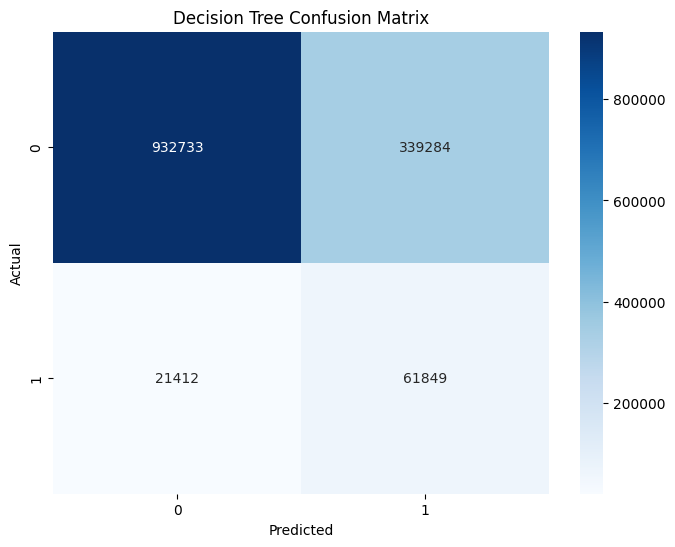

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

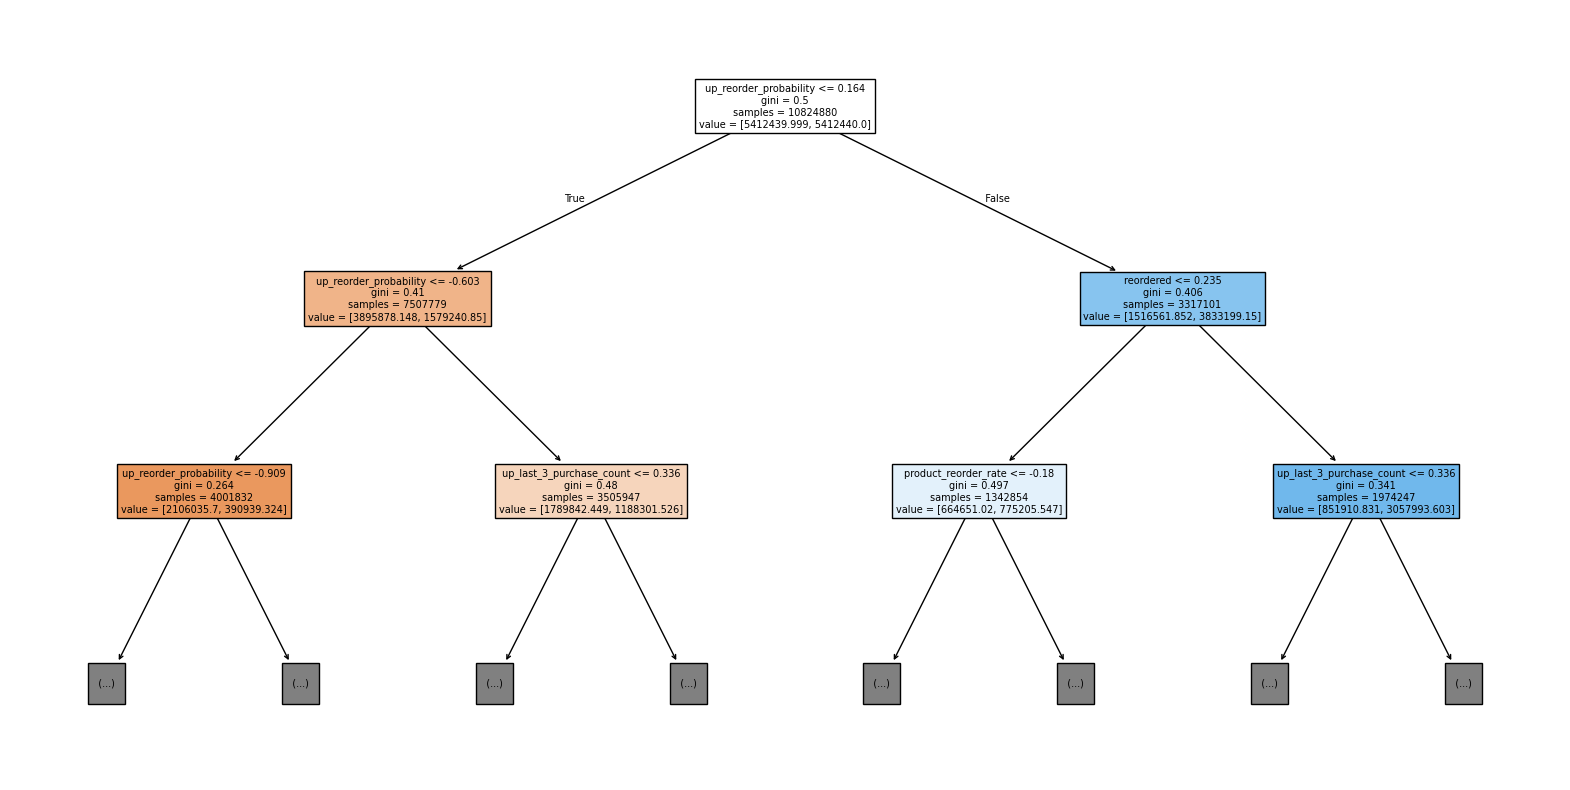

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, max_depth=2, feature_names=features, filled=True)
plt.show()